In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import mplcursors
from IPython.display import display, HTML, Image, Markdown

In [2]:
current_directory = os.getcwd()
parent_directory = os.path.abspath(os.path.join(current_directory, os.pardir))
dataset_dir = os.path.join(parent_directory,"Datasets")

In [3]:
players_df = pd.read_csv(f"{dataset_dir}/players.csv")
match_scores_df = pd.read_csv(f"{dataset_dir}/match_scores.csv")
fixtures_df = pd.read_csv(f"{dataset_dir}/fixtures.csv")
teams_df = pd.read_csv(f"{dataset_dir}/teams.csv")

In [4]:
def get_top_scorers(n_players):
    try:
        grouped_df = match_scores_df.groupby("player_id").agg({"runs":"sum", "is_out": "sum","player_id":"size"}).rename(columns={"player_id":"innings"}).sort_values(by="runs",ascending=False).reset_index()
        grouped_df["average"] = grouped_df["runs"] / grouped_df["is_out"]
        top_scorers = pd.merge(grouped_df, players_df, on="player_id")[["name","runs","innings","average","image_path"]].head(n_players)
        display(HTML(f"<h2>Top {n_players} Runs Scorer</h2>"))
        for index, row in top_scorers.iterrows():
            image_path = row["image_path"] 
            image = Image(filename=image_path, width=140, height=140)
            display(image)
            display(HTML(f"<div style='display: flex; align-items: center;'>"
                 f"<div style='margin-left: 10px;'>{image}</div>"
                 f"<div style='margin-right: 20px'>"
                 f"<h3>{row['name']}</h3>"
                 f"<p><b>Runs:</b> {row['runs']}</p>"
                 f"<p><b>Innings:</b> {row['innings']}</p>"
                 f"<p><b>Average:</b> {row['average']:.2f}</p>"
                 f"</div>"
                 f"</div>"))
    except Exception as err:
        print(err)

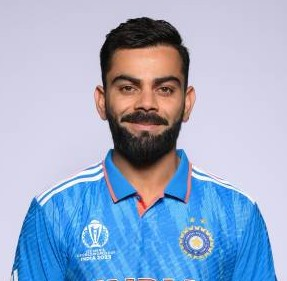

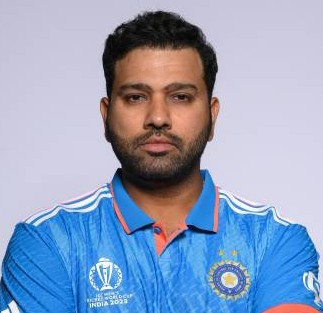

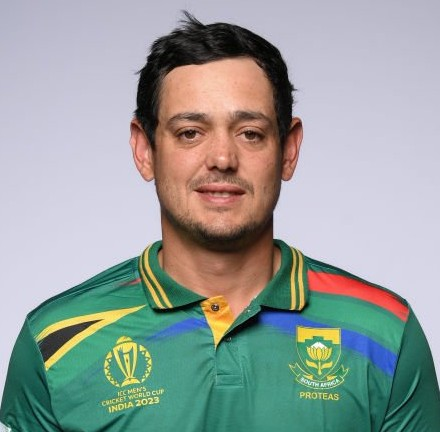

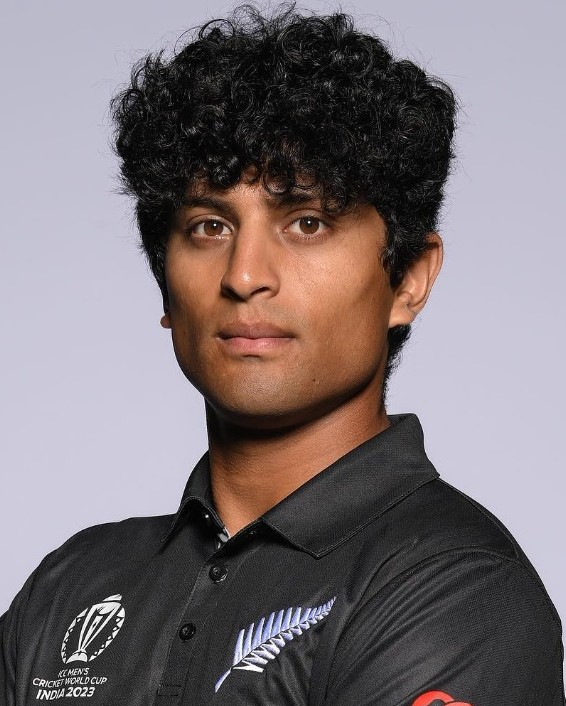

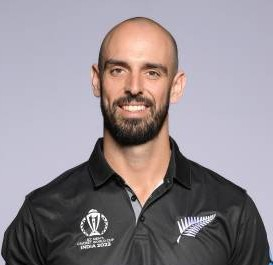

In [5]:
get_top_scorers(5)

In [6]:
def get_top_scorers_by_country():
    total_runs_by_player = match_scores_df.groupby(["team_id","player_id"]).agg({"runs":"sum", "is_out": "sum", "player_id":"size"}).rename(columns={"player_id":"innings"})
    total_runs_by_player["average"] = total_runs_by_player["runs"] / total_runs_by_player["is_out"]
    top_scorers = total_runs_by_player.loc[total_runs_by_player.groupby("team_id")["runs"].idxmax()]
    top_scorers_by_country = pd.merge(top_scorers, players_df, on='player_id').sort_values('runs', ascending=False)
    display(HTML("<h2>Top Scorers by Countries</h2>"))
    for index, row in top_scorers_by_country.iterrows():
            image_path = row["image_path"] 
            image = Image(filename=image_path, width=140, height=140)
            display(image)
            display(HTML(f"<div style='display: flex; align-items: center;'>"
                 f"<div style='margin-left: 10px;'>{image}</div>"
                 f"<div style='margin-right: 20px'>"
                 f"<h3>{row['name']}</h3>"
                 f"<p><b>Runs:</b> {row['runs']}</p>"
                 f"<p><b>Innings:</b> {row['innings']}</p>"
                 f"<p><b>Average:</b> {row['average']:.2f}</p>"
                 f"</div>"
                 f"</div>"))

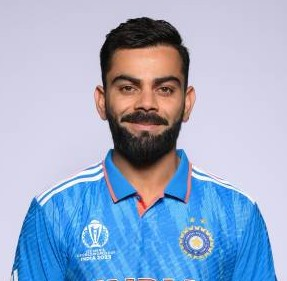

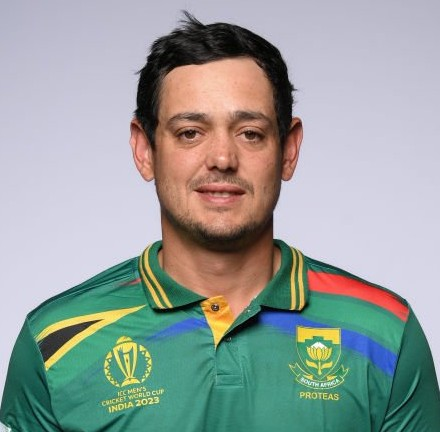

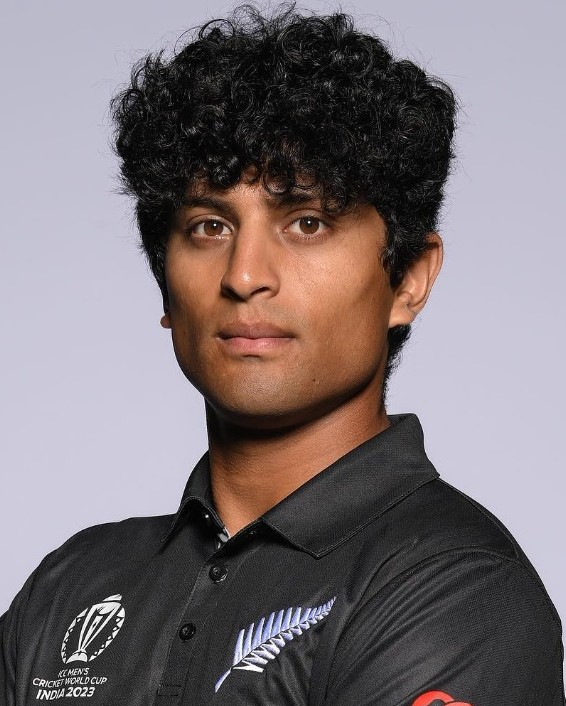

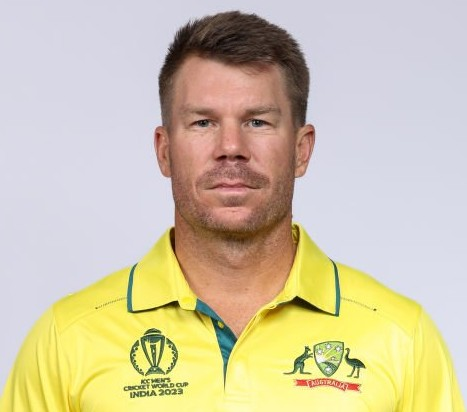

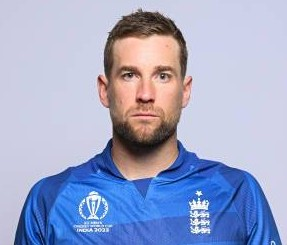

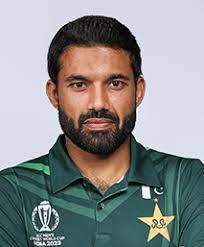

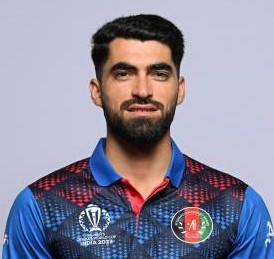

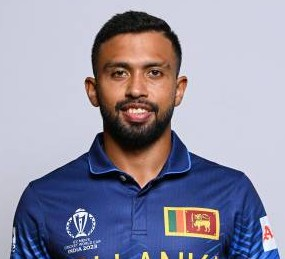

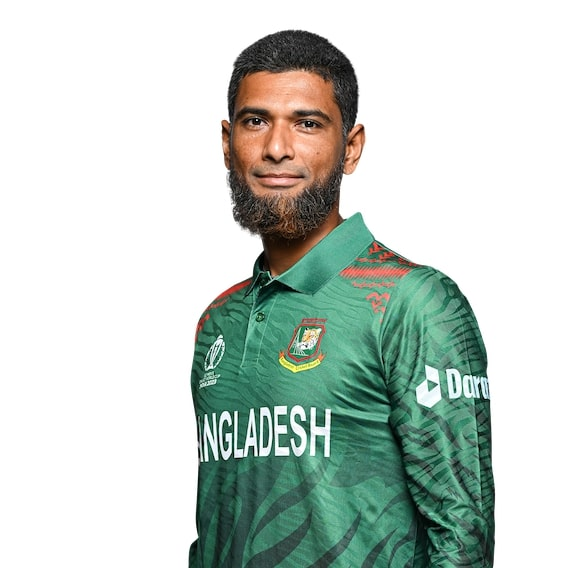

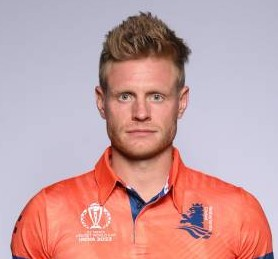

In [7]:
get_top_scorers_by_country()

In [8]:
def plot_points_timeline():
    teams = list(teams_df["team_name"])

    team_points_table_per_match = {}
    team_points = {}

    for team in teams:
        team_points[team] = 0
        team_points_table_per_match[team] = [0]

    for index, row in fixtures_df.iterrows():
        if row["semi_final_1"] == 0 and row["semi_final_2"] == 0 and row["is_final"] == 0:
            team_one = teams_df.loc[teams_df["team_id"] == row['team_one_id'], "team_name"].values[0]
            team_two = teams_df.loc[teams_df["team_id"] == row['team_two_id'], "team_name"].values[0]
            team_won = teams_df.loc[teams_df["team_id"] == row['team_won_id'], "team_name"].values[0]

            team_points[team_one] += 2 if team_one == team_won else 0
            team_points[team_two] += 2 if team_won == team_two else 0

            team_points_table_per_match[team_two].append(team_points.get(team_two))
            team_points_table_per_match[team_one].append(team_points.get(team_one))

    fig, ax = plt.subplots()

    lines = {}
    for country, values in team_points_table_per_match.items():
        lines[country], = ax.plot(values, label=country)

    ax.set_xlabel('Matches')
    ax.set_ylabel('Points')
    ax.set_title('Interactive Line Plot for All Countries')

    y_ticks = list(range(0, max(max(values) for values in team_points_table_per_match.values()) + 1, 2))
    ax.set_yticks(y_ticks)
    
    x_ticks = list(range(10))
    ax.set_xticks(x_ticks)
    
    ax.legend()

    cursor = mplcursors.cursor(hover=True)

    plt.show()

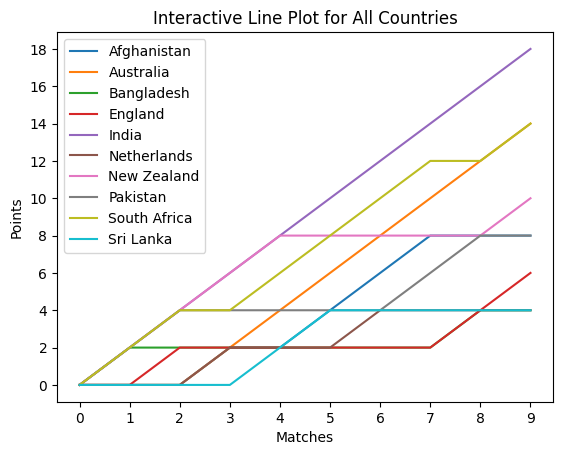

In [9]:
plot_points_timeline()